## Setting up metadata for Dimona Infrasound Array (Israel)

Author: Jelle Assink (jelle.assink@knmi.nl)

This code is distributed under the terms of the
GNU General Public License, Version 3
(https://www.gnu.org/licenses/gpl-3.0.en.html)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 125

In [2]:
from obspy.core.inventory.util import Site
from obspy.core.inventory import Station
from obspy import UTCDateTime
from pysametadata.core.metadata import Metadata

In [3]:
from obspy.clients.nrl import NRL

In [4]:
nrl = NRL()

# Setting up the basis of an `Inventory`:

In [5]:
t0 = UTCDateTime('2004-01-01T00:00:00')

In [6]:
IM_I0BR = Metadata(code='IM', name='I0BR', institute='Soreq',
                   description='NDC infra network')
IM_I0BR.set_network(code=IM_I0BR.code,
                    description='NDC infra network',
                    starttime=t0)
net = IM_I0BR.network

In [7]:
site_info = Site('Dimona INFRASONIC ARRAY',
                 description='Dimona INFRASONIC ARRAY',
                 town='Dimona', country='Israel')

# Station inventory
net.stations.append(Station('I0B1', 31.03008, 35.15785, 458.9, vault=1.0))
net.stations.append(Station('I0B2', 31.02313, 35.09582, 465.0, vault=1.0))
net.stations.append(Station('I0B3', 30.98000, 35.14368, 464.9, vault=1.0))
net.stations.append(Station('I0B4', 31.00883, 35.13393, 473.9, vault=1.0))

In [8]:
print(nrl.sensors['CEA-DASE']['MB2000 Microbarometer (infrasound)'])
sens_keys = ['CEA-DASE','MB2000 Microbarometer (infrasound)']

('MB2000 (Infrasound), 0.02-4 Hz, 0.02 V/Pa', 'http://ds.iris.edu/NRL/sensors/dase/RESP.XX.NS343..BDF.MB2000.0_25.0_02')


In [9]:
print(nrl.dataloggers['Quanterra']['Q330SR']['1']['40']['LINEAR AT ALL SPS'])
dlog_keys = ['Quanterra','Q330SR','1','40','LINEAR AT ALL SPS']

('Q330SR, gain 1, 40 sps, linear filters for all sample rates', 'http://ds.iris.edu/NRL/dataloggers/quanterra/RESP.XX.NQ004..BHZ.Q330.SR.1.40.all')


In [10]:
response = nrl.get_response(datalogger_keys=dlog_keys, sensor_keys=sens_keys)

print(response)

Channel Response
	From PA () to COUNTS (Digital Counts)
	Overall Sensitivity: 419430 defined at 0.050 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from PA to V, gain: 0.02
		Stage 2: ResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 419430
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


/Users/assink/opt/miniconda3/envs/py37/lib/python3.7/site-packages/obspy/clients/nrl/client.py:228: UserWarning: Failed to recalculate overall sensitivity.
  warnings.warn(msg)


In [11]:
print('Creating metadata objects ...')
for sta in net.stations:
    print(' - station [ {network}.{station} ]'.format(
        network=net.code, station=sta.code))
    IM_I0BR.set_station(sta, site_info, starttime=t0)
    
    channel = IM_I0BR.set_channel('BDF', sta, sample_rate=40.0, starttime=t0)
    channel.response = response
    IM_I0BR.calculate_sensitivity(channel)
    sta.channels.append(channel)

Creating metadata objects ...
 - station [ IM.I0B1 ]
 - station [ IM.I0B2 ]
 - station [ IM.I0B3 ]
 - station [ IM.I0B4 ]


In [12]:
# Combine the network entries in one inventory
IM_I0BR.inventory.networks.append(IM_I0BR.network)

Inventory created at 2020-09-17T11:01:15.293492Z
	Created by: ObsPy 1.2.1
		    https://www.obspy.org
	Sending institution: NDC infra network (Soreq)
	Contains:
		Networks (1):
			IM
		Stations (4):
			IM.I0B1 (Dimona INFRASONIC ARRAY)
			IM.I0B2 (Dimona INFRASONIC ARRAY)
			IM.I0B3 (Dimona INFRASONIC ARRAY)
			IM.I0B4 (Dimona INFRASONIC ARRAY)
		Channels (4):
			IM.I0B1..BDF, IM.I0B2..BDF, IM.I0B3..BDF, IM.I0B4..BDF
Plotting inventory ...


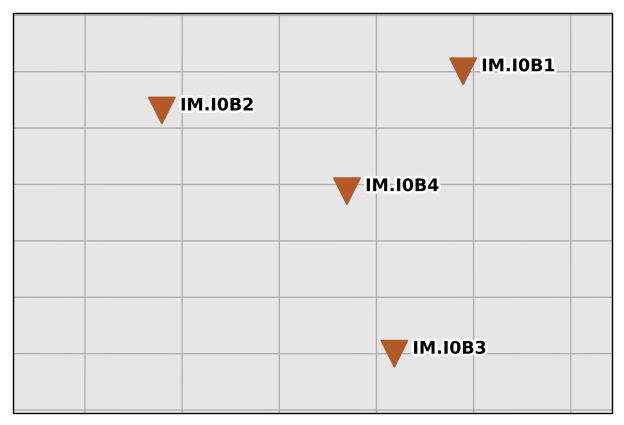

In [13]:
print(IM_I0BR.inventory)

print('Plotting inventory ...')
fig=IM_I0BR.inventory.plot(projection='local', resolution='f')

Of course the inventory can be written to disk:


Station I0B1 (Dimona INFRASONIC ARRAY)
	Station Code: I0B1
	Channel Count: None/None (Selected/Total)
	2004-01-01T00:00:00.000000Z - 
	Access: open Alternate Code: I0BR 
	Latitude: 31.03, Longitude: 35.16, Elevation: 458.9 m
	Available Channels:
		I0B1..BDF
Inventory created at 2020-09-17T11:01:15.293492Z
	Created by: ObsPy 1.2.1
		    https://www.obspy.org
	Sending institution: NDC infra network (Soreq)
	Contains:
		Networks (1):
			IM
		Stations (1):
			IM.I0B1 (Dimona INFRASONIC ARRAY)
		Channels (1):
			IM.I0B1..BDF
--------------------------------------------------------------------------------
Channel 'BDF', Location '' (Microbarometric pressure)
	Time range: 2004-01-01T00:00:00.000000Z - --
	Latitude: 31.03, Longitude: 35.16, Elevation: 458.9 m, Local Depth: 1.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Sampling Rate: 40.00 Hz
	Response information available
Channel Response
	From PA (Pascals) to COUNTS (Counts)
	Overall Sensitivity

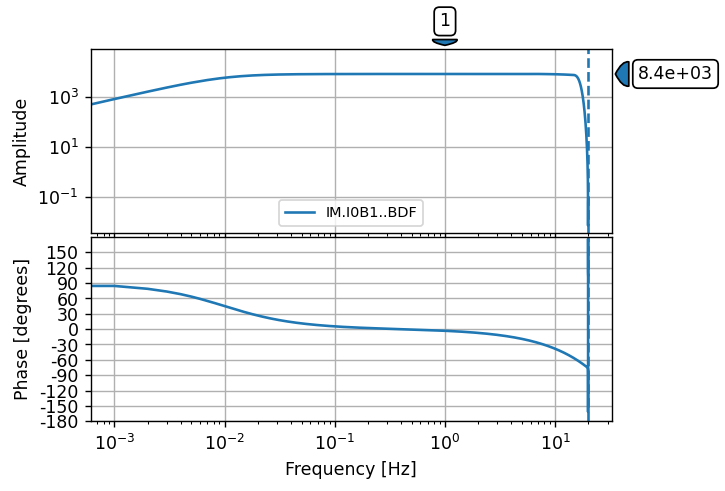

Writing out [ IM.I0BR/IM.I0B1.xml ] ...

Station I0B2 (Dimona INFRASONIC ARRAY)
	Station Code: I0B2
	Channel Count: None/None (Selected/Total)
	2004-01-01T00:00:00.000000Z - 
	Access: open Alternate Code: I0BR 
	Latitude: 31.02, Longitude: 35.10, Elevation: 465.0 m
	Available Channels:
		I0B2..BDF
Inventory created at 2020-09-17T11:01:15.293492Z
	Created by: ObsPy 1.2.1
		    https://www.obspy.org
	Sending institution: NDC infra network (Soreq)
	Contains:
		Networks (1):
			IM
		Stations (1):
			IM.I0B2 (Dimona INFRASONIC ARRAY)
		Channels (1):
			IM.I0B2..BDF
--------------------------------------------------------------------------------
Channel 'BDF', Location '' (Microbarometric pressure)
	Time range: 2004-01-01T00:00:00.000000Z - --
	Latitude: 31.02, Longitude: 35.10, Elevation: 465.0 m, Local Depth: 1.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Sampling Rate: 40.00 Hz
	Response information available
Channel Response
	From PA (Pascals)

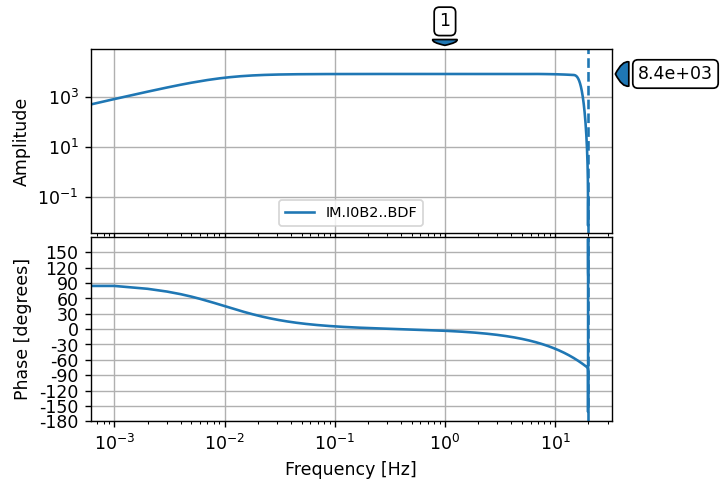

Writing out [ IM.I0BR/IM.I0B2.xml ] ...

Station I0B3 (Dimona INFRASONIC ARRAY)
	Station Code: I0B3
	Channel Count: None/None (Selected/Total)
	2004-01-01T00:00:00.000000Z - 
	Access: open Alternate Code: I0BR 
	Latitude: 30.98, Longitude: 35.14, Elevation: 464.9 m
	Available Channels:
		I0B3..BDF
Inventory created at 2020-09-17T11:01:15.293492Z
	Created by: ObsPy 1.2.1
		    https://www.obspy.org
	Sending institution: NDC infra network (Soreq)
	Contains:
		Networks (1):
			IM
		Stations (1):
			IM.I0B3 (Dimona INFRASONIC ARRAY)
		Channels (1):
			IM.I0B3..BDF
--------------------------------------------------------------------------------
Channel 'BDF', Location '' (Microbarometric pressure)
	Time range: 2004-01-01T00:00:00.000000Z - --
	Latitude: 30.98, Longitude: 35.14, Elevation: 464.9 m, Local Depth: 1.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Sampling Rate: 40.00 Hz
	Response information available
Channel Response
	From PA (Pascals)

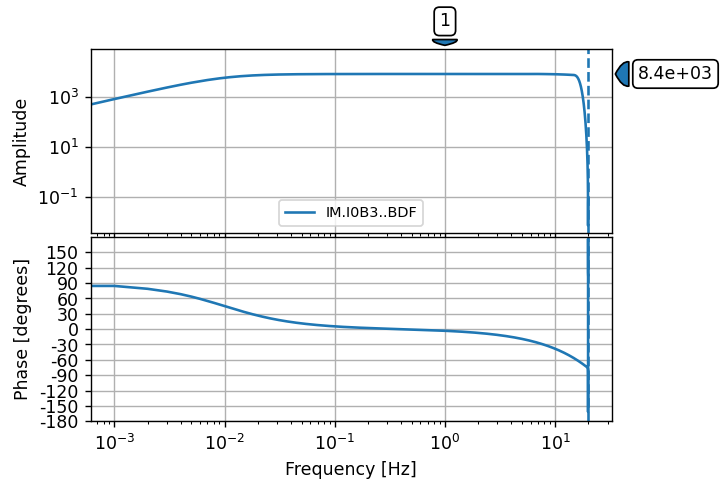

Writing out [ IM.I0BR/IM.I0B3.xml ] ...

Station I0B4 (Dimona INFRASONIC ARRAY)
	Station Code: I0B4
	Channel Count: None/None (Selected/Total)
	2004-01-01T00:00:00.000000Z - 
	Access: open Alternate Code: I0BR 
	Latitude: 31.01, Longitude: 35.13, Elevation: 473.9 m
	Available Channels:
		I0B4..BDF
Inventory created at 2020-09-17T11:01:15.293492Z
	Created by: ObsPy 1.2.1
		    https://www.obspy.org
	Sending institution: NDC infra network (Soreq)
	Contains:
		Networks (1):
			IM
		Stations (1):
			IM.I0B4 (Dimona INFRASONIC ARRAY)
		Channels (1):
			IM.I0B4..BDF
--------------------------------------------------------------------------------
Channel 'BDF', Location '' (Microbarometric pressure)
	Time range: 2004-01-01T00:00:00.000000Z - --
	Latitude: 31.01, Longitude: 35.13, Elevation: 473.9 m, Local Depth: 1.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Sampling Rate: 40.00 Hz
	Response information available
Channel Response
	From PA (Pascals)

Writing out [ IM.I0BR/IM.I0B4.xml ] ...



In [14]:
IM_I0BR.write(plot_response=True, write_group=False)

In [15]:
del (IM_I0BR)